<a href="https://colab.research.google.com/github/iciromaco/Trial/blob/master/%E5%B1%80%E6%89%80%E7%89%B9%E5%BE%B4%E9%87%8F%E3%81%AE%E6%AF%94%E8%BC%83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Colaboratory で実行する場合の注意事項

SIFT特徴 と SURF 特徴の技術には著作権があり、無断で商用利用ができません。そのため、Google 版の opencv からはそれらの関数が取り除かれています。個人的な実験や研究用途であれば問題がないので、強制的に使えるバージョンと入れ替えます。

途中エラーが表示されますが、問題ありません。

# <font color='red'>↓Google Colaboratoryで実行している場合のみ、次のセルを実行してください。</font>

In [0]:
!pip uninstall opencv-python -y
# downgrade OpenCV a bit since some none-free features are not avilable
!pip install opencv-contrib-python==3.4.2.17 --force-reinstall

# <font color='red'>↑ Google Colaboratory で実行する場合は上のセルを実行</font>

# 局所変特徴の比較


#### <font color='red'>SIFT,SURF特徴量は特許の問題があり， Google Colaboratory では使えません．　そのため、それを含むバージョンの opencv （cv2）に入れ替えて実行する必要があります。</font>

## 課題の概要
SIFT, SURF, AKAZE, FAST の４種の局所特徴について，スケーリング，回転，照明条件に対する不変性と処理速度を比較考察する．

## 準備

サンプルとして，**fonts.jpg** という画像が添付してある．この画像を参考にして，別の画像を自分で作成しなさい．　（　Google Colab で実行する場合は左のエリアでアップロードしてから実行してください。　）

**fonts.jpg** は同じ画像をスケーリング、回転、明るさを変えて並べてある。自分で用意する画像も、「スケーリング，回転，照明条件に対する不変性」を調べる、という課題内容を考えて、対象画像を作る、ないし選ぶこと。

本来一般の画像に適用される技術ですので、例に引きずられて単純な図形にする必要はありません。　
例えば　人物、おもちゃ、自動車、商品パッケージ、などなんでも構いません。

## 課題 1. 　スケーリング，回転，照明条件に対する不変性の比較

1. **スケール変化に対する不変性**　図形のサイズが拡大縮小しても，同じ位置に同じ特徴が得られる．
2. **回転に対する不変性** 図形が回転しても，同じ位置に同じ特徴が得られる．
3. **照明条件（濃淡変化）に対する不変性** 照明条件が変わっても同じ位置に同じ特徴が得られる．

の３つの不変性があるかどうか，どの程度変化に頑健かを考察しなさい．

## 課題２.　 処理速度の比較実験

jupyter notebook では，セルの頭に %%time と記述することでセル内のプログラムの実行の所要時間を計測できる．

４つの特徴について，処理速度（ userの タイムの値が小さほど速い ) を比較考察しなさい．

### 注意

- 言うまでもないが，実験対象画像，結果画像を必ずレポートに記載すること．また，画像だけではなく．結果がどうであったかと考察内容を文章として記述すること．

- 特徴円内の半径の線の方向の基準方向を表す．また円の大きさは特徴を正規化する基準サイズを表す．
　同じ特徴であるためには，特徴の位置だけでなく，基準方向と基準サイズが相対的に同一であるかどうかについても注意すること．  
　（相対的に同一とは，例えば，図形が４５度回転しているなら基準方向も４５度回転しており，スケールが２倍なら，基準サイズも２倍であるということ）

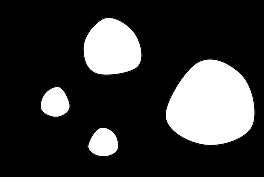

In [0]:
from scipy.ndimage.filters import gaussian_filter
import numpy as np
import PIL.Image as Image
import matplotlib.pyplot as plt
import io, urllib
import cv2
%matplotlib inline

f = io.BytesIO(urllib.request.urlopen("https://goo.gl/W9MQDT").read()) # ★ネット上の画像の場合　ここを変える"
#f = io.BytesIO(urllib.request.urlopen("file:fonts.jpg").read())　# 自分で画像ファイルをアップロードして使う場合　fonts.jpg はアップロードした画像の名前に変える
org = Image.open(f).convert('L') #  L はグレイスケール変換の意味
gray = np.array(org)
# org.show()
org.resize((np.asarray(org.size)//2))

### 　　　　　　　　　↑　 図１　実験対象画像

# 実験１　SIFT特徴

In [0]:
%%time
# SIFT 特徴
sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(gray,None)

CPU times: user 73.2 ms, sys: 26.1 ms, total: 99.3 ms
Wall time: 83.8 ms


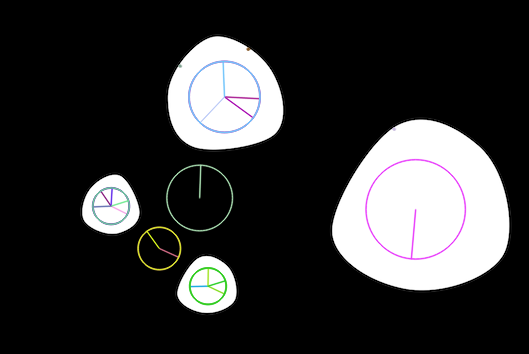

In [0]:
#結果の表示
#img=cv2.drawKeypoints(gray,kp,None)
img=cv2.drawKeypoints(gray,kp,None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
Image.fromarray(img[:,:,::-1])

### 　　　　　　　　　↑　 図２　　SIFT特徴の抽出結果

In [0]:
%%time
# SURF 特徴
surf = cv2.xfeatures2d.SURF_create()
kp = surf.detect(gray,None)

CPU times: user 66.7 ms, sys: 2.74 ms, total: 69.4 ms
Wall time: 46.9 ms


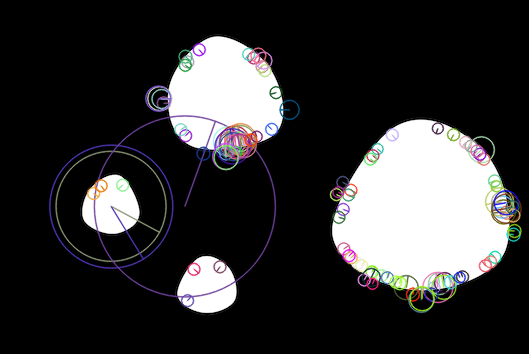

In [0]:
#結果の表示
#img=cv2.drawKeypoints(gray,kp,None)
img=cv2.drawKeypoints(gray,kp,None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
Image.fromarray(img[:,:,::-1])

### 　　　　　　　　　↑　 図3　　SURF特徴の抽出結果

In [0]:
%%time
# AKAZE 特徴
akaze = cv2.AKAZE_create()
kp = akaze.detect(gray,None)

CPU times: user 67.7 ms, sys: 6.34 ms, total: 74 ms
Wall time: 56.7 ms


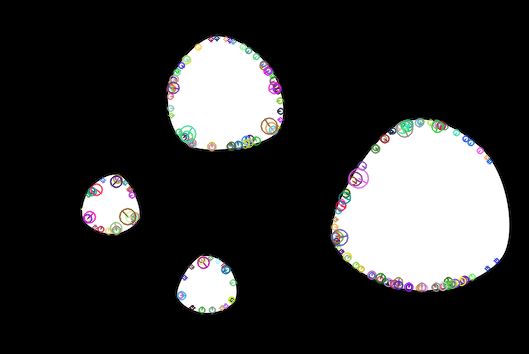

In [0]:
#結果の表示
#img=cv2.drawKeypoints(gray,kp,None)
img=cv2.drawKeypoints(gray,kp,None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
Image.fromarray(img[:,:,::-1])

### 　　　　　　　　　↑　 図4　　AKAZE特徴の抽出結果

In [0]:
%%time
# FAST 特徴
fast = cv2.FastFeatureDetector_create()
kp = fast.detect(gray,None)

CPU times: user 513 µs, sys: 99 µs, total: 612 µs
Wall time: 428 µs


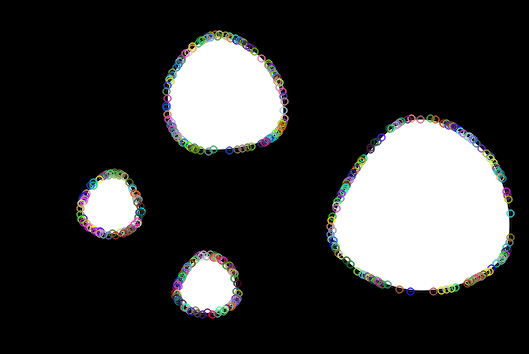

In [0]:
# ↑　時間の単位に注意．FAST は非常に高速なので，1 ms 未満となる場合がある．そのときは，μs 表示なので間違わないように，
#結果の表示
#img=cv2.drawKeypoints(gray,kp,None)
img=cv2.drawKeypoints(gray,kp,None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
Image.fromarray(img[:,:,::-1])

### 　　　　　　　　　↑　 図5　　FAST特徴の抽出結果